In [44]:
import numpy as np

import requests 
import datetime

from cStringIO import StringIO
import pandas as pd
from dateutil import tz
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def dateparse_NOAA(s):
    """Parse the dates from the NOAA files."""

    unaware = datetime.datetime.strptime(s, '%Y-%m-%d %H:%M')
    aware = unaware.replace(tzinfo=tz.tzutc())

    return aware


In [37]:
def get_NOAA_wlev(station_no, start_date, end_date):
    """Download water level data from NOAA site for one NOAA station
    for specified period.

    :arg station_no: Station number e.g. 9443090.
    :type station_no: int

    :arg start_date: Start date; e.g. '01-JAN-2010'.
    :type start_date: str

    :arg end_date: End date; e.g. '31-JAN-2010'
    :type end_date: str

    :returns: Saves text file with water level data in meters at one station. Time zone is UTC
    """
    st_ar = datetime.datetime.strptime(start_date, '%d-%b-%Y')
    end_ar = datetime.datetime.strptime(end_date, '%d-%b-%Y')

    base_url = (
        'http://tidesandcurrents.noaa.gov/api/datagetter'
        '?product=water_level&application=NOS.COOPS.TAC.WL')
    params = {
        'begin_date': st_ar.strftime('%Y%m%d'),
        'end_date': end_ar.strftime('%Y%m%d'),
        'datum': 'MSL',
        'station': str(station_no),
        'time_zone': 'GMT',
        'units': 'metric',
        'format': 'csv',
    }
    response = requests.get(base_url, params=params)

    fakefile = StringIO(response.content)
    try:
        obs = pd.read_csv(
            fakefile, parse_dates=[0], date_parser=dateparse_NOAA)
    except ValueError:
        data = {'Date Time': st_ar.datetime, ' Water Level': float('NaN')}
        obs = pd.DataFrame(data=data, index=[0])
    obs = obs.rename(columns={'Date Time': 'time', ' Water Level': 'wlev'})
    return obs


In [40]:
stn = 9443090
obs= get_NOAA_wlev(stn,'07-JUL-2015','08-JUL-2015')

In [41]:
print(obs)


                          time   wlev   Sigma   O   F   R   L  Quality 
0    2015-07-07 00:00:00+00:00  0.928   0.004   0   0   0   0         p
1    2015-07-07 00:06:00+00:00  0.925   0.004   0   0   0   0         p
2    2015-07-07 00:12:00+00:00  0.921   0.004   0   0   0   0         p
3    2015-07-07 00:18:00+00:00  0.928   0.004   0   0   0   0         p
4    2015-07-07 00:24:00+00:00  0.942   0.003   0   0   0   0         p
5    2015-07-07 00:30:00+00:00  0.947   0.005   0   0   0   0         p
6    2015-07-07 00:36:00+00:00  0.941   0.004   0   0   0   0         p
7    2015-07-07 00:42:00+00:00  0.934   0.003   0   0   0   0         p
8    2015-07-07 00:48:00+00:00  0.935   0.004   0   0   0   0         p
9    2015-07-07 00:54:00+00:00  0.932   0.004   0   0   0   0         p
10   2015-07-07 01:00:00+00:00  0.915   0.004   0   0   0   0         p
11   2015-07-07 01:06:00+00:00  0.897   0.005   0   0   0   0         p
12   2015-07-07 01:12:00+00:00  0.887   0.005   0   0   0   0   

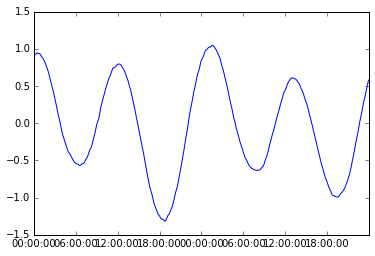

In [47]:
plt.plot(obs.time, obs.wlev)